In [1]:
import pandas as pd
import numpy as np
import re
import requests
from rapidfuzz import process
from lxml import html, etree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
celulares = pd.read_csv('data_plazavea.csv', delimiter=',')

In [3]:
celulares.head(5)

,nombre,marca,sku,precio,precio_online,bateria,ram,capacidad,sistema_operativo
0,"Smartphone XIAOMI Redmi Note 13 Pro+ 5G 6.67"" ...",XIAOMI,20393839,4,1849,"5,000mAh - 120W HyperCharge",12GB,512GB,Android
1,"Celular Honor 200 Lite 8GB RAM 256GB 6.7"" Star...",HONOR,NaN,4,1199,NaN,8GB,256GB,NaN
2,Infinix GT 20 Pro 5G 12Gb Ram 256Gb Rom Silver,INFINIX,NaN,4,1399,5000 mAh,12GB,256GB,NaN
3,"Smartphone MOTOROLA G34 6.5"" 8GB 256GB 50MP+2M...",MOTOROLA,20402226,4,649,5000 mAh,8GB,256GB,NaN
4,Reacondicionado iPhone 13 256GB Medianoche,APPLE,NaN,4,2649,NaN,4GB,256GB,NaN


In [4]:
celulares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nombre             602 non-null    object
 1   marca              602 non-null    object
 2   sku                87 non-null     object
 3   precio             602 non-null    int64 
 4   precio_online      602 non-null    object
 5   bateria            485 non-null    object
 6   ram                598 non-null    object
 7   capacidad          599 non-null    object
 8   sistema_operativo  323 non-null    object
dtypes: int64(1), object(8)
memory usage: 42.5+ KB


In [5]:
celulares['bateria'].unique()

array(['5,000mAh - 120W HyperCharge', nan, '5000 mAh', '4441 mAh',
       '4310mAh', '6000 mAh', '5000mAh',
       '5000mAh / 67W wired charge (67W inbox)', '3.227 mAh', '4500 mAh',
       'Batería de iones de litio recargable integrada', '4900 mAh',
       '3046mAh', '4,200 mAh', '5.000 mAh', '5000\xa0mAh', '5000',
       '5010 mAh', '4,422mAh', '5,000mAh', '3227 mAh', '800mAh',
       '5200 mAh', '5100mAh', '4.500mAh', '3.349 mAh', '5000 | mAh',
       '3110mAh', '3349 mAh', '5800 mAh', '2000 mAh', '5330mAh',
       '5000 m Ah', '5800mAh', '5200mAh', '5010mAh', '4000mAh',
       '5600 mAh', '5030 mAh', '2227mAh', '3274 mAh', '3650 mAh',
       '4500mAh', '5011 mah', '2815 mAh', '5000 mah', '4323 mAh',
       '3.227mAh', '4352mAh', '3279 mAh', '4.600 mAh', 'Xiaomi',
       '3.279 mAh', '3240mAh', '2815mAh', '5300 mAh', '1821mAh',
       '4400 mAh', '3125 mAh', '5,000 mAh', '3900 mAh', '2000mAh',
       '4575 mAh', '5100 mAh', 'si', '-', '5012 mah', '5050 mAh',
       '4300 mAh', '3800

In [6]:
celulares['nombre'].unique()

array(['Smartphone XIAOMI Redmi Note 13 Pro+ 5G 6.67" 12GB 512GB 200MP + 8MP + 2MP Blanco',
       'Celular Honor 200 Lite 8GB RAM 256GB 6.7" Starry Blue+Earbuds X5',
       'Infinix GT 20 Pro 5G 12Gb Ram 256Gb Rom Silver',
       'Smartphone MOTOROLA G34 6.5" 8GB 256GB 50MP+2MP Negro Meteorito',
       'Reacondicionado iPhone 13 256GB Medianoche',
       'Reacondicionado iPhone 14 128GB Rojo',
       'Celular ZTE BLADE A54 4GB RAM 128GB Gris',
       'Celular Motorola Moto G54 8gb 256gb Negro',
       'Celular Redmi Note 13 6.67" 8GB 256GB Midnight Black',
       'iPhone 15 Pro Max 512GB (eSIM) - Black Titanium',
       'Reacondicionado iPhone 12 64GB Verde',
       'Smartphone ZTE Nubia Flip 8+256GB Dorado',
       'Celular Xiaomi Redmi 13C Navy Blue 8GB RAM 256GB ROM',
       'Xiaomi Redmi Note 13 Pro Plus 5G 256GB 8GB Blanco',
       'Reacondicionado iPhone 13 256GB Rosa',
       'Celular Motorola Moto G04S 4+128GB Verde Aurora',
       'Honor X7A 128GB 6GB Ram Color Silver',
     

In [7]:
celulares['marca'].unique()

array(['XIAOMI', 'HONOR', 'INFINIX', 'MOTOROLA', 'APPLE', 'ZTE BLADE',
       'ZTE', 'SAMSUNG', 'TCL', 'ADVANCE', 'HUAWEI', 'POCO', 'VIVO',
       'LANDBYTE', 'OPPO', 'TECNO', 'GOOGLE', 'GENÉRICO'], dtype=object)

In [8]:
celulares['sistema_operativo'].unique()

array(['Android', nan, 'Dispositivos Android', 'Smartphones',
       'Dispositivos Apple', 'Windows/Mac Os/Android Os.',
       'Computadoras/Smartphone',
       'Dispositivos Apple Y Android,Computadoras Y Similares',
       'Dispositivos Android,Smartphones', 'Automóvil', 'No Aplica',
       'Dispositivos Android,Computadoras Y Similares',
       'Smartphones,Dispositivos Android',
       'Dispositivos Apple,Dispositivos Apple Y Android,Dispositivos Android',
       'Computadoras/Smartphone,Dispositivos Android',
       'Dispositivos Apple Y Android',
       'Computadoras/Smartphone,Smartphones,Smartphones,Tablets,Reproductores Mp3,Etc.,Teléfonos,Smartphones/Reproductores Mp3,Smartphones/Gps/Otros,Dispositivos Android',
       'Smartphones,Dispositivos Smartphones, Entre Otros,Dispositivos Apple Y Android,Dispositivos Android,Smartphones/Reproductores Mp3,Smartphones,Tablets,Reproductores Mp3,Etc.'],
      dtype=object)

In [9]:
celulares['capacidad'].unique()

array(['512GB', '256GB', '128GB', '64GB', nan, '128MB', '32MB', '8GB',
       '32GB', '1TB', '256MB'], dtype=object)

### Data Cleaning & Pre-processing

In [10]:
# Transformaciones

#Palabras innecesarias del modelo las vamos a reemplazar
celulares['nombre'] = celulares['nombre'].str.title()
celulares['nombre'] = celulares['nombre'].str.replace('Celular','')
celulares['nombre'] = celulares['nombre'].str.replace('Reacondicionado','')
celulares['nombre'] = celulares['nombre'].str.replace('Smartphone','')
celulares['nombre'] = celulares['nombre'].str.replace('Black','')
celulares['nombre'] = celulares['nombre'].str.replace('Light','')

#Limpiamos el campo bateria de caracteres especiales y otros.
celulares = celulares[(celulares['bateria'] != '800mAh') & (celulares['bateria'] != 'Xiaomi') & (celulares['bateria'] != 'si') & (celulares['bateria'] != '-')]
celulares['bateria'] = celulares['bateria'].replace('Batería de iones de litio recargable integrada', np.nan)
celulares['bateria'] = celulares['bateria'].apply(lambda x: str(x)[:5] if pd.notna(x) else x)
celulares['bateria'] = celulares['bateria'].str.replace('.', '', regex=False)
celulares['bateria'] = celulares['bateria'].str.replace(',', '', regex=False)
celulares['bateria'] = celulares['bateria'].str.replace('m', '', regex=False)
celulares['bateria'] = celulares['bateria'].str.replace('\xa0', '', regex=False)

#Eliminamos marcas de modelos que no son smarthpones y homogenizamos nombres de marcas.
indices_a_eliminar = celulares[(celulares['marca'] == 'GENÉRICO') | (celulares['marca'] == 'LANDBYTE') | (celulares['marca'] == 'ADVANCE')].index
celulares = celulares.drop(indices_a_eliminar)
celulares['marca'] = celulares['marca'].replace('ZTE BLADE', 'ZTE')
celulares['marca'] = celulares['marca'].replace('POCO', 'XIAOMI')
celulares['marca'] = celulares['marca'].str.capitalize()

celulares = celulares[~ ( (celulares['nombre'].str.contains('Smartwatch', case=False, na=True)) | (celulares['nombre'].str.contains('Masajeador', case=False, na=True)) )]

#Eliminamos columnas skus y precios por tener un porcentaje alto de valores nulos y valores invalidos repsectivamente.
celulares.drop(columns=['sku', 'precio'], inplace=True)
celulares = celulares.reset_index(drop=True)

In [11]:
# Función para eliminar la primera palabra y su espacio
def remove_first_word(text):
    # Dividir el texto en una lista de palabras
    words = text.split()
    
    # Eliminar la primera palabra y unir el resto
    rest_of_text = ' '.join(words[1:])
    
    return rest_of_text

# Aplicar la función a la columna 'nombre¡'
celulares['nombre'] = celulares['nombre'].apply(remove_first_word)

In [12]:
#Identificando valores nulos de columnas 'ram' y 'capacidad'
celulares[ celulares['ram'].isnull() | celulares['capacidad'].isnull() ]

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
19,Redmi Note 13 Pro 6.67” 8Gb 256Gb Lavender Purple,Xiaomi,1099,5000,8 GB,NaN,NaN
82,"Redmi 13C 6.74"" 8Gb Ram 256Gb Negro",Xiaomi,599,5000,NaN,8GB,NaN
439,"Redmi 13C 6.74"" 8Gb Ram 256Gb Azul",Xiaomi,599,5000,NaN,8GB,NaN


In [13]:
#Asignando los valores correctos de capacidad y ram de estos elementos(información real en la columna nombre)
celulares.loc[[19, 82, 439], 'capacidad'] = '256GB'
celulares.loc[[19, 82, 439], 'ram'] = '8GB'

In [14]:
celulares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nombre             585 non-null    object
 1   marca              585 non-null    object
 2   precio_online      585 non-null    object
 3   bateria            469 non-null    object
 4   ram                585 non-null    object
 5   capacidad          585 non-null    object
 6   sistema_operativo  311 non-null    object
dtypes: object(7)
memory usage: 32.1+ KB


In [15]:
#Vamos a completar por condicionales el sistema operativo:
#    (1)Dispositivos de marca Apple -->iOS
#    (2)Dispositivos que no son Apple ni de Huawei --> Android
#    (3)Dispositivos de Huawei(salvo el modelo Y9S que es Android) --> EMUI
celulares.loc[celulares['marca'] == 'Apple', 'sistema_operativo'] = 'iOS'
celulares.loc[~celulares['marca'].isin(['Apple', 'Huawei']), 'sistema_operativo'] = 'Android'
celulares.loc[(celulares['marca'] == 'Huawei') & ~celulares['nombre'].str.contains('Y9S'), 'sistema_operativo'] = 'EMUI'
celulares.loc[(celulares['marca'] == 'Huawei') & celulares['nombre'].str.contains('Y9S'), 'sistema_operativo'] = 'Android'

In [16]:
celulares[celulares['bateria'].isnull()]

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
1,"200 Lite 8Gb Ram 256Gb 6.7"" Starry Blue+Earbud...",Honor,1199,NaN,8GB,256GB,Android
4,13 256Gb Medianoche,Apple,2649,NaN,4GB,256GB,iOS
5,14 128Gb Rojo,Apple,2999,NaN,6GB,128GB,iOS
6,Blade A54 4Gb Ram 128Gb Gris,Zte,359,NaN,4GB,128GB,Android
10,12 64Gb Verde,Apple,1349,NaN,4GB,64GB,iOS
...,...,...,...,...,...,...,...
573,13 Pro Max 256Gb Oro,Apple,3399,NaN,6GB,256GB,iOS
574,14 Pro 256Gb Plata,Apple,3849,NaN,6GB,256GB,iOS
579,14 Pro 128Gb Morado,Apple,3599,NaN,6GB,128GB,iOS
581,Moto G84 8Gb Ram 256Gb Negro Esim,Motorola,949,NaN,8GB,256GB,Android


In [17]:
celulares['bateria'] = celulares['bateria'].fillna('0')
celulares['bateria'] = celulares['bateria'].astype('float')

In [18]:
# Primero, filtramos el DataFrame para excluir valores de batería que son 0
celulares_con_bateria = celulares[celulares['bateria'] > 0]

In [19]:
# Calcular el promedio de batería por marca
promedio_bateria_marca = celulares_con_bateria.groupby('marca')['bateria'].mean()

In [20]:
promedio_bateria_marca

marca
Apple       3659.472973
Google      4931.250000
Honor       5141.739130
Huawei      4400.000000
Infinix     4955.555556
Motorola    4806.250000
Oppo        5000.000000
Samsung     4923.484848
Tcl         5010.250000
Tecno       5000.000000
Vivo        5000.000000
Xiaomi      4985.050505
Zte         4466.521739
Name: bateria, dtype: float64

In [21]:
#Reemplazamos los valores de bateria 0(previamente nan) con el promedio de marca que le corresponde
celulares['bateria'] = celulares.apply(lambda row: promedio_bateria_marca[row['marca']] if row['bateria'] == 0 else row['bateria'], axis=1)
celulares['bateria'] = celulares['bateria'].round().astype(int)

celulares['precio_online'] = celulares['precio_online'].astype(float)
celulares

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
0,"Redmi Note 13 Pro+ 5G 6.67"" 12Gb 512Gb 200Mp +...",Xiaomi,1849.0,5000,12GB,512GB,Android
1,"200 Lite 8Gb Ram 256Gb 6.7"" Starry Blue+Earbud...",Honor,1199.0,5142,8GB,256GB,Android
2,Gt 20 Pro 5G 12Gb Ram 256Gb Rom Silver,Infinix,1399.0,5000,12GB,256GB,Android
3,"G34 6.5"" 8Gb 256Gb 50Mp+2Mp Negro Meteorito",Motorola,649.0,5000,8GB,256GB,Android
4,13 256Gb Medianoche,Apple,2649.0,3659,4GB,256GB,iOS
...,...,...,...,...,...,...,...
580,Galaxy A55 256Gb 8Gb Ram Awesome Navy,Samsung,1569.0,5000,12GB,512GB,Android
581,Moto G84 8Gb Ram 256Gb Negro Esim,Motorola,949.0,4806,8GB,256GB,Android
582,Galaxy S24 Plus 256Gb 12Gb Violet,Samsung,3699.0,4900,12GB,256GB,Android
583,S23 Ultra 5G 256Gb 12Gb Ram Negro,Samsung,3649.0,5000,12GB,256GB,Android


In [22]:
celulares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre             585 non-null    object 
 1   marca              585 non-null    object 
 2   precio_online      585 non-null    float64
 3   bateria            585 non-null    int64  
 4   ram                585 non-null    object 
 5   capacidad          585 non-null    object 
 6   sistema_operativo  585 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.1+ KB


In [23]:
#Revisando los valores unicos de la columna ram
celulares['ram'].value_counts()

ram
8GB      229
12GB     113
4GB      112
6GB      106
3GB       12
2GB        6
256GB      5
1.5GB      2
Name: count, dtype: int64

In [24]:
#Identificamos 5 casos en los que la memoria ram es 256 GB, lo cual no es posible.
celulares[celulares['ram']=='256GB']

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
70,Nova 12S Blanco 8Gb 256Gb Dual Sim + Freebuds ...,Huawei,1399.0,4500,256GB,8GB,EMUI
131,Spark 20 Pro 8Gb+256Gb Negro - Tecno Spark 20 ...,Tecno,679.0,5000,256GB,8GB,Android
260,Nova 12I 8Gb+256Gb Verde + Watch Gt Cyber,Huawei,889.0,4500,256GB,8GB,EMUI
472,Nova 12S Azul 8Gb 256Gb Dual Sim + Freebuds Pro 2,Huawei,1399.0,4500,256GB,8GB,EMUI
489,Nova 12I 8Gb+256Gb Negro + Watch Gt Cyber,Huawei,889.0,4500,256GB,8GB,EMUI


In [25]:
#La ram y la capacidad estan asignadas de forma erronea.
celulares.loc[[70,131,260,472,489] ,'ram'] = '8GB'
celulares.loc[[70,131,260,472,489] , 'capacidad'] = '256GB'

In [26]:
celulares.loc[[70,131,260,472,489]]

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
70,Nova 12S Blanco 8Gb 256Gb Dual Sim + Freebuds ...,Huawei,1399.0,4500,8GB,256GB,EMUI
131,Spark 20 Pro 8Gb+256Gb Negro - Tecno Spark 20 ...,Tecno,679.0,5000,8GB,256GB,Android
260,Nova 12I 8Gb+256Gb Verde + Watch Gt Cyber,Huawei,889.0,4500,8GB,256GB,EMUI
472,Nova 12S Azul 8Gb 256Gb Dual Sim + Freebuds Pro 2,Huawei,1399.0,4500,8GB,256GB,EMUI
489,Nova 12I 8Gb+256Gb Negro + Watch Gt Cyber,Huawei,889.0,4500,8GB,256GB,EMUI


In [27]:
#Identificamos casos en los que la capacidad es de 128MB y 256MB, para modelos gama media y premium, specs que no corresponden
#a modelos vigentes de estos segmentos.
celulares[(celulares['capacidad']=='128MB') | (celulares['capacidad']=='256MB')]

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
241,Iphone 13 128Gb Negro,Apple,2729.0,3227,4GB,128MB,iOS
267,Edge 40 Neo 256Gb 8Gb Ram Negro,Motorola,1349.0,5000,8GB,256MB,Android
385,15 Pro Max 256Gb Titanium Blue Chip Fisico,Apple,5199.0,4422,8GB,256MB,iOS


In [28]:
celulares.loc[celulares['capacidad'] == '128MB', 'capacidad'] = '128GB'
celulares.loc[celulares['capacidad'] == '256MB', 'capacidad'] = '256GB'

In [29]:
#Obtenemos una lista de nombres de los modelos de smartphones para cada una de las marcas de interes
#Implementremos un scrapeo simple a la página web especializada de móviles Phonesdata

# Inicializar la lista para almacenar los datos
data = []

# Lista de marcas en minúsculas
url_marcas = [brand.lower() for brand in celulares['marca'].unique()]

# Iterar sobre cada marca
for url_marca in url_marcas:
    modelos_unicos = []
    url_ = f'https://phonesdata.com/es/smartphones/{url_marca}/'
    headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"}

    response = requests.get(url_, headers=headers)

    if response.status_code == 200:
        pagina_html = html.fromstring(response.text)

        # Extraer los modelos de la página
        for item in pagina_html.xpath("//div[@class='product-item']/a/span/strong/text()"):
            modelos_unicos.append(item)
        
        # Agregar los modelos a la lista de datos con la marca correspondiente
        for modelo in modelos_unicos:
            data.append({'marca': url_marca, 'modelo': modelo})
    else:
        print(f'Error {response.status_code} al acceder a {url_}')

# Crear el DataFrame de nombres estandar de modelos con la data de Phonesdata
df_modelos = pd.DataFrame(data)
df_modelos['marca'] = df_modelos['marca'].str.capitalize()
df_modelos['modelo'] = df_modelos['modelo'].str.title()
df_modelos

,marca,modelo
0,Xiaomi,14 Civi
1,Xiaomi,14 Ultra
2,Xiaomi,14T
3,Xiaomi,14T Pro
4,Xiaomi,Civi 4 Pro
...,...,...
3279,Google,Pixel 3 Xl
3280,Google,Pixel 2
3281,Google,Pixel 2 Xl
3282,Google,Pixel


In [30]:
# Función para extraer palabras de un texto
def extraer_palabras(texto):
    # Usar expresiones regulares para extraer palabras, ignorando caracteres especiales
    palabras = re.findall(r'\S+', texto)
    return palabras

# Extraer palabras de cada texto en la columna 'modelo' del dataframe df_modelos
todas_las_palabras = df_modelos['modelo'].apply(extraer_palabras)

# Palabras a excluir
palabras_a_excluir = {'Dual', 'Sim','5G','4G'}

# Filtrar las palabras excluyendo las no deseadas
lista_palabras = list( set ( [palabra for sublist in todas_las_palabras for palabra in sublist] ) )
lista_palabras = [palabra for palabra in lista_palabras if palabra not in palabras_a_excluir]

In [31]:
celulares

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo
0,"Redmi Note 13 Pro+ 5G 6.67"" 12Gb 512Gb 200Mp +...",Xiaomi,1849.0,5000,12GB,512GB,Android
1,"200 Lite 8Gb Ram 256Gb 6.7"" Starry Blue+Earbud...",Honor,1199.0,5142,8GB,256GB,Android
2,Gt 20 Pro 5G 12Gb Ram 256Gb Rom Silver,Infinix,1399.0,5000,12GB,256GB,Android
3,"G34 6.5"" 8Gb 256Gb 50Mp+2Mp Negro Meteorito",Motorola,649.0,5000,8GB,256GB,Android
4,13 256Gb Medianoche,Apple,2649.0,3659,4GB,256GB,iOS
...,...,...,...,...,...,...,...
580,Galaxy A55 256Gb 8Gb Ram Awesome Navy,Samsung,1569.0,5000,12GB,512GB,Android
581,Moto G84 8Gb Ram 256Gb Negro Esim,Motorola,949.0,4806,8GB,256GB,Android
582,Galaxy S24 Plus 256Gb 12Gb Violet,Samsung,3699.0,4900,12GB,256GB,Android
583,S23 Ultra 5G 256Gb 12Gb Ram Negro,Samsung,3649.0,5000,12GB,256GB,Android


In [32]:
#Función para conservar palabras de un texto
def conserva_palabras(text, words_to_remove):
    # Dividir el texto en una lista de palabras
    words = text.split()
    
    # Filtrar las palabras, eliminando las que están en la lista de palabras a eliminar
    filtered_words = [word for word in words if word in words_to_remove]
    
    # Unir las palabras filtradas en una sola cadena de texto
    return ' '.join(filtered_words)

# Aplicar la función a la columna 'nombre' del dataframe celulares
celulares['nombre_preprocesado'] = celulares['nombre'].apply(lambda x: conserva_palabras(x, lista_palabras))
celulares['nombre_preprocesado'] = celulares['nombre_preprocesado'].str.replace(r'\+\s*\+', '', regex=True)

In [33]:
# Fuzzy Matching: Ahora aplicaremos la libreria Rapidfuzzy para homologar los nombres de modelos de celulares

# Paso 1: Crear un diccionario de modelos únicos por marca
modelos_por_marca = df_modelos.groupby('marca')['modelo'].apply(list).to_dict()

# Función para normalizar el nombre del modelo usando RapidFuzz
def normalize_model_name(row):
    marca = row['marca']
    nombre = row['nombre_preprocesado']
    
    # Obtener los modelos únicos para la marca específica
    unique_names = modelos_por_marca.get(marca, [])
    
    # Normalizar el nombre del modelo usando RapidFuzz
    match = process.extractOne(nombre, unique_names)
    return match[0] if match else None

# Paso 2: Aplicar la función de normalización en el DataFrame celulares
celulares['modelo_normalizado'] = celulares.apply(normalize_model_name, axis=1)

In [34]:
celulares

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo,nombre_preprocesado,modelo_normalizado
0,"Redmi Note 13 Pro+ 5G 6.67"" 12Gb 512Gb 200Mp +...",Xiaomi,1849.0,5000,12GB,512GB,Android,Redmi Note 13 Pro +,Redmi Note 13 Pro+
1,"200 Lite 8Gb Ram 256Gb 6.7"" Starry Blue+Earbud...",Honor,1199.0,5142,8GB,256GB,Android,200 Lite X5,200 Lite
2,Gt 20 Pro 5G 12Gb Ram 256Gb Rom Silver,Infinix,1399.0,5000,12GB,256GB,Android,Gt 20 Pro,Gt 20 Pro
3,"G34 6.5"" 8Gb 256Gb 50Mp+2Mp Negro Meteorito",Motorola,649.0,5000,8GB,256GB,Android,G34,Moto G34
4,13 256Gb Medianoche,Apple,2649.0,3659,4GB,256GB,iOS,13,Iphone 13
...,...,...,...,...,...,...,...,...,...
580,Galaxy A55 256Gb 8Gb Ram Awesome Navy,Samsung,1569.0,5000,12GB,512GB,Android,Galaxy A55,Galaxy A55 5G
581,Moto G84 8Gb Ram 256Gb Negro Esim,Motorola,949.0,4806,8GB,256GB,Android,Moto G84,Moto G84
582,Galaxy S24 Plus 256Gb 12Gb Violet,Samsung,3699.0,4900,12GB,256GB,Android,Galaxy S24 Plus,Galaxy S24
583,S23 Ultra 5G 256Gb 12Gb Ram Negro,Samsung,3649.0,5000,12GB,256GB,Android,S23 Ultra,Galaxy S23 Ultra


### Exploratory Data Analysis - EDA

In [35]:
celulares.describe()

,precio_online,bateria
count,5.850000e+02,585.000000
mean,1.927170e+04,4569.376068
std,4.133575e+05,695.290273
min,2.490000e+02,1821.000000
25%,8.590000e+02,4000.000000
50%,1.569000e+03,5000.000000
75%,3.199000e+03,5000.000000
max,9.999876e+06,6000.000000


In [36]:
celulares[celulares['precio_online'] == celulares['precio_online'].max()]

,nombre,marca,precio_online,bateria,ram,capacidad,sistema_operativo,nombre_preprocesado,modelo_normalizado
350,"200 6.7"" 12Gb 256Gb 50Mp + 50Mp + 12Mp Verde",Honor,9999876.0,5200,12GB,256GB,Android,200,200


In [37]:
# Filtrar los precios de la marca 'Honor', excluyendo el valor actual
Valor_maximo_erroneo = celulares['precio_online'].max()
honor_precio = celulares[celulares['marca'] == 'Honor']
precio_actual = honor_precio.loc[honor_precio['precio_online'] == Valor_maximo_erroneo, 'precio_online'].values[0]

# Calcular el promedio, excluyendo el precio actual
promedio_honor = honor_precio[honor_precio['precio_online'] != precio_actual]['precio_online'].mean()

# Reemplazar el valor en la fila correspondiente
celulares.loc[(celulares['marca'] == 'Honor') & (celulares['precio_online'] == precio_actual), 'precio_online'] = promedio_honor

In [38]:
celulares.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precio_online,585.0,2180.330674,1749.048559,249.0,859.0,1569.0,3199.0,8739.0
bateria,585.0,4569.376068,695.290273,1821.0,4000.0,5000.0,5000.0,6000.0


C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\1632690878.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=celulares, x='bateria', hue='sistema_operativo', fill=True, palette=colores, common_norm=False)


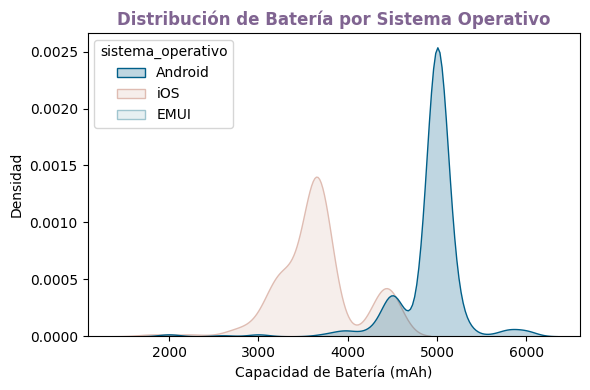

In [39]:
colores = ['#005f89','#DFBCB2','#a0c5cf'] 
# Crear el gráfico KDE para batería
plt.figure(figsize=(6, 4))
sns.kdeplot(data=celulares, x='bateria', hue='sistema_operativo', fill=True, palette=colores, common_norm=False)
plt.title('Distribución de Batería por Sistema Operativo', color='#806491', fontweight='bold')
plt.xlabel('Capacidad de Batería (mAh)')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

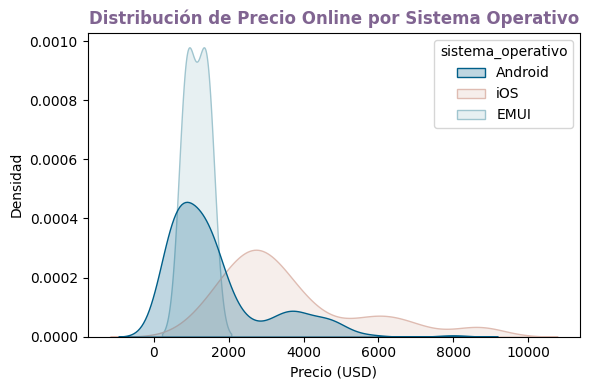

In [40]:
colores = ['#005f89','#DFBCB2','#a0c5cf'] 
# Crear el gráfico KDE para precio_online
plt.figure(figsize=(6, 4))
sns.kdeplot(data=celulares, x='precio_online', hue='sistema_operativo', fill=True, palette=colores, common_norm=False)
plt.title('Distribución de Precio Online por Sistema Operativo', color='#806491', fontweight='bold')
plt.xlabel('Precio (USD)')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

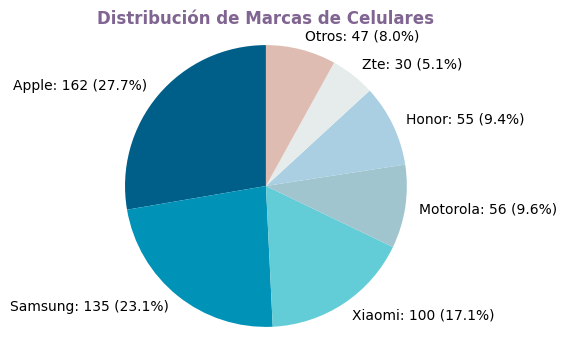

In [41]:
# Contar las marcas
cuenta_marcas = celulares['marca'].value_counts().reset_index()
cuenta_marcas.columns = ['marca', 'cuenta']
cuenta_marcas['porcentaje'] = (cuenta_marcas['cuenta'] / cuenta_marcas['cuenta'].sum()) * 100

# Definir un umbral para mostrar porcentajes
umbral = 5.1

# Agrupar las marcas que son menores al umbral
marcas_otros = cuenta_marcas[cuenta_marcas['porcentaje'] < umbral]
cuenta_otros = marcas_otros['cuenta'].sum()
porcentaje_otros = marcas_otros['porcentaje'].sum()

# Crear un nuevo DataFrame con la categoría "Otros"
cuenta_marcas = cuenta_marcas[cuenta_marcas['porcentaje'] >= umbral]

# Crear un DataFrame para "Otros"
otros_df = pd.DataFrame({
    'marca': ['Otros'],
    'cuenta': [cuenta_otros],
    'porcentaje': [porcentaje_otros]
})

# Concatenar los DataFrames
cuenta_marcas = pd.concat([cuenta_marcas, otros_df], ignore_index=True)

# Crear etiquetas para el gráfico
cuenta_marcas['etiqueta'] = cuenta_marcas.apply(
    lambda row: f"{row['marca']}: {row['cuenta']} ({row['porcentaje']:.1f}%)", 
    axis=1
)

colores = ['#005f89','#0093b7','#63cdd7','#a0c5cf','#aacfe2','#e6eceb','#DFBCB2']
# Gráfico de pie usando matplotlib
plt.figure(figsize=(4, 4))
plt.pie(cuenta_marcas['cuenta'], labels=cuenta_marcas['etiqueta'], autopct='', startangle=90,colors=colores)

# Ajustar el tamaño de los textos
plt.title('Distribución de Marcas de Celulares',color='#806491', fontweight='bold')
plt.axis('equal')  # Para que el pie sea un círculo
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\4164884817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_modelos['porcentaje'] = (top_10_modelos['cuenta'] / top_10_modelos['cuenta'].sum()) * 100


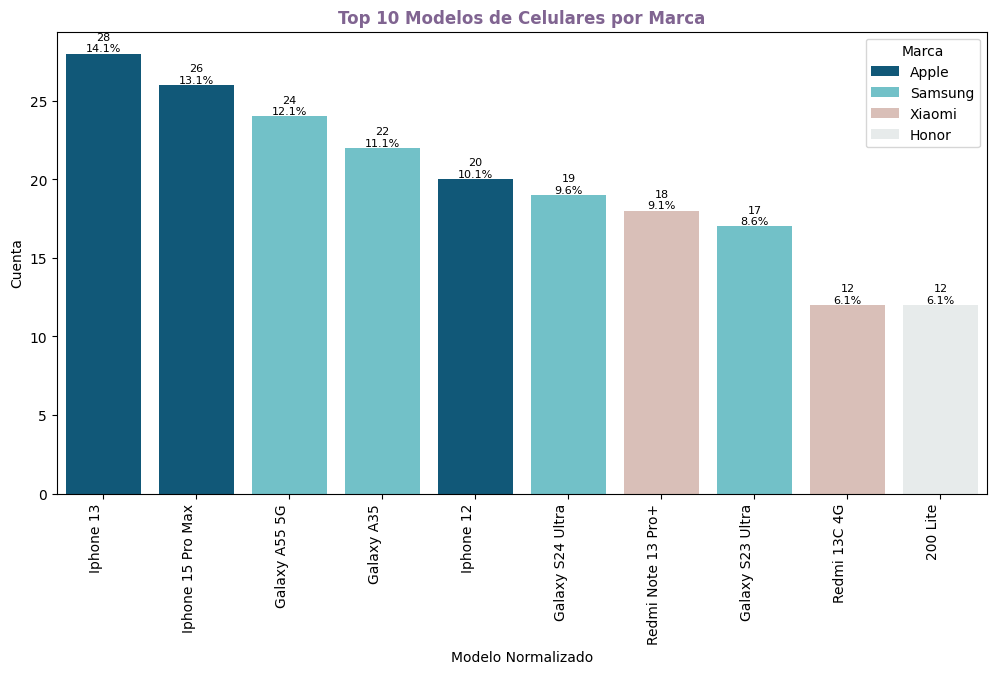

In [44]:
# Contar modelos
cuenta_modelos = celulares['modelo_normalizado'].value_counts().reset_index()
cuenta_modelos.columns = ['modelo_normalizado', 'cuenta']

# Obtener el top 10
top_10_modelos = cuenta_modelos.head(10)

# Calcular porcentaje
top_10_modelos['porcentaje'] = (top_10_modelos['cuenta'] / top_10_modelos['cuenta'].sum()) * 100

# Realizar un left join para incluir la marca
top_10_modelos = top_10_modelos.merge(celulares[['modelo_normalizado', 'marca']], on='modelo_normalizado', how='left')

# Eliminar filas duplicadas
top_10_modelos = top_10_modelos.drop_duplicates()

# Resetear índices
top_10_modelos = top_10_modelos.reset_index(drop=True)

# Paleta de colores personalizada
colores = ['#005f89', '#63cdd7', '#DFBCB2', '#e6eceb']

# Crear el barplot con hue
plt.figure(figsize=(12, 6))
sns.barplot(x='modelo_normalizado', y='cuenta', data=top_10_modelos, hue='marca', palette=colores)

# Añadir etiquetas y título
plt.title('Top 10 Modelos de Celulares por Marca', color='#806491', fontweight='bold')
plt.xlabel('Modelo Normalizado')
plt.ylabel('Cuenta')

# Mostrar cuenta y porcentaje en las barras
for index, row in top_10_modelos.iterrows():
    plt.text(index, row['cuenta'], f'{row["cuenta"]}\n{row["porcentaje"]:.1f}%', 
             color='black', ha='center', va='bottom', fontsize=8)

# Rotar las etiquetas del eje x
plt.xticks(rotation=90, ha='right')

# Mostrar leyenda
plt.legend(title='Marca')
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\4085139800.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ram', data=celulares, order=ram_counts.index, palette=colores)


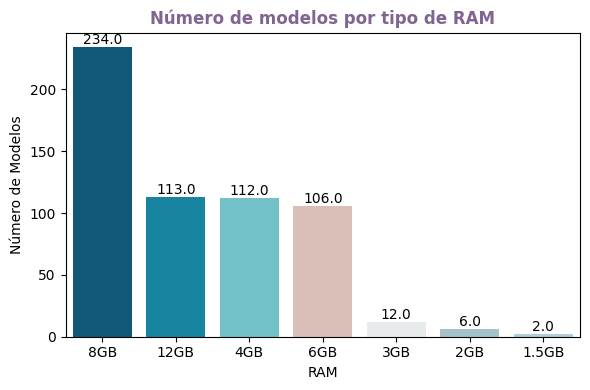

In [45]:
colores = ['#005f89','#0093b7','#63cdd7','#DFBCB2','#e6eceb', '#a0c5cf', '#aacfe2'] 

# Gráfico de conteo para RAM
plt.figure(figsize=(6, 4))
ram_counts = celulares['ram'].value_counts()
ax = sns.countplot(x='ram', data=celulares, order=ram_counts.index, palette=colores)
plt.title('Número de modelos por tipo de RAM', color='#806491', fontweight='bold')
plt.xlabel('RAM')
plt.ylabel('Número de Modelos')

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\3282554253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='capacidad', data=celulares, order=capacidad_counts.index, palette=colores)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\3282554253.py:6: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  ax = sns.countplot(x='capacidad', data=celulares, order=capacidad_counts.index, palette=colores)


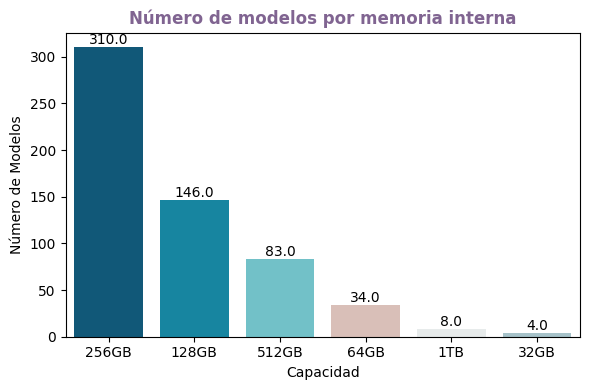

In [47]:
colores = ['#005f89','#0093b7','#63cdd7','#DFBCB2','#e6eceb', '#a0c5cf', '#aacfe2'] 

# Gráfico de conteo para Capacidad
plt.figure(figsize=(6, 4))
capacidad_counts = celulares['capacidad'].value_counts()
ax = sns.countplot(x='capacidad', data=celulares, order=capacidad_counts.index, palette=colores)
plt.title('Número de modelos por memoria interna', color='#806491', fontweight='bold')
plt.xlabel('Capacidad')
plt.ylabel('Número de Modelos')

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\2973953672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sistema_operativo', data=celulares, order=so_counts.index, palette=colores)


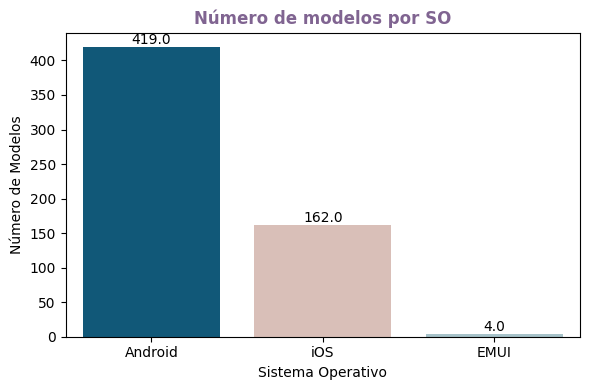

In [46]:
colores = ['#005f89','#DFBCB2','#a0c5cf'] 

# Gráfico de conteo para Sistema Operativo
plt.figure(figsize=(6, 4))
so_counts = celulares['sistema_operativo'].value_counts()
ax = sns.countplot(x='sistema_operativo', data=celulares, order=so_counts.index, palette=colores)
plt.title('Número de modelos por SO', color='#806491', fontweight='bold')   
plt.xlabel('Sistema Operativo')
plt.ylabel('Número de Modelos')

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\3365035333.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marca', y='bateria', data=celulares, palette=palette)


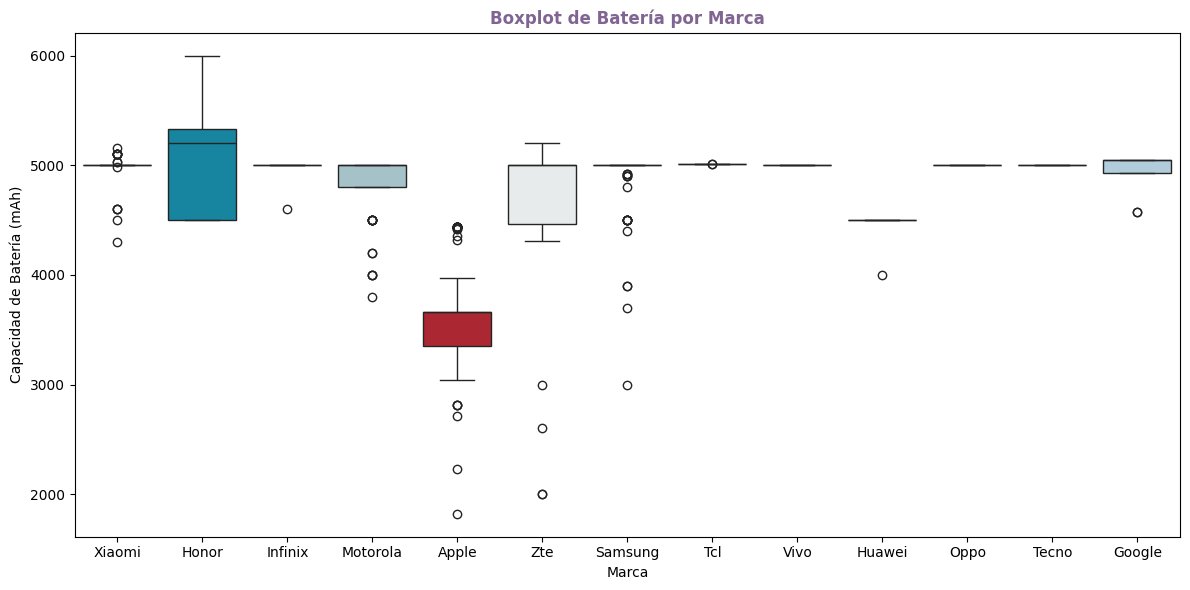

In [42]:
# Definir los colores
colores = ['#005f89','#0093b7','#63cdd7','#a0c5cf','#c1121f','#e6eceb','#DFBCB2','#006d77','#f77f00','#3c6e71','#5fa8d3','#90e0ef','#aacfe2']

# Crear un diccionario que asocie cada marca con un color
palette = dict(zip(celulares['marca'].unique(), colores))

# Boxplot de batería
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca', y='bateria', data=celulares, palette=palette)
plt.title('Boxplot de Batería por Marca', color='#806491', fontweight='bold')
plt.xlabel('Marca')
plt.ylabel('Capacidad de Batería (mAh)')
plt.tight_layout()
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_9176\83925644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marca', y='precio_online', data=celulares, palette=palette)


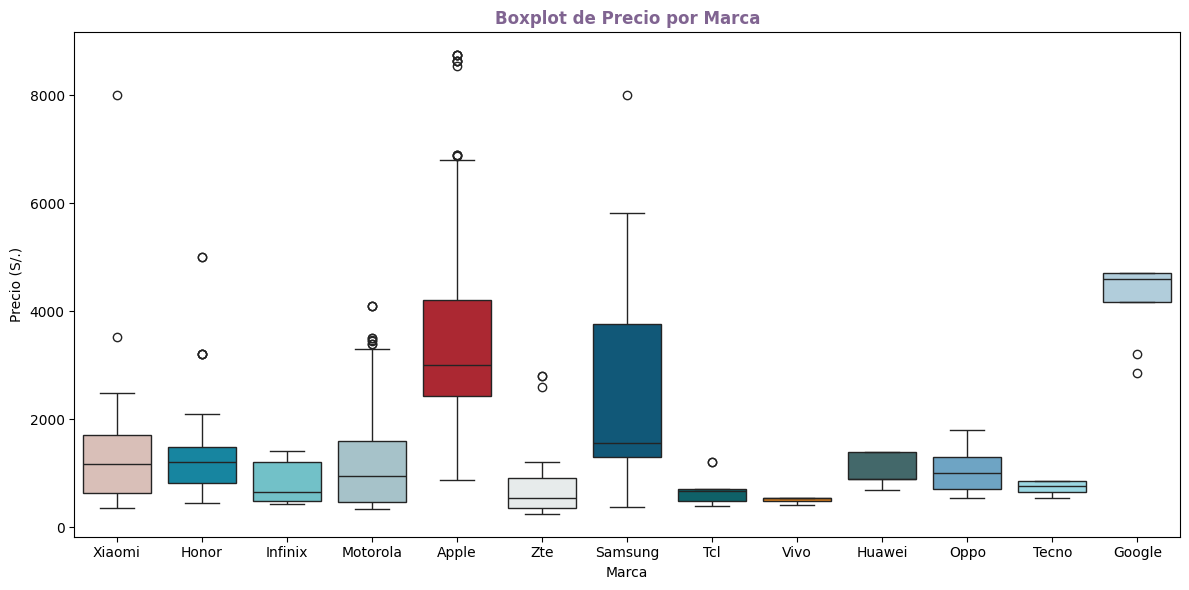

In [43]:
# Definir los colores
colores = ['#DFBCB2','#0093b7','#63cdd7','#a0c5cf','#c1121f','#e6eceb','#005f89','#006d77','#f77f00','#3c6e71','#5fa8d3','#90e0ef','#aacfe2']

# Crear un diccionario que asocie cada marca con un color
palette = dict(zip(celulares['marca'].unique(), colores))

# Boxplot de precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca', y='precio_online', data=celulares, palette=palette)
plt.title(f'Boxplot de Precio por Marca', color='#806491', fontweight='bold')
plt.xlabel('Marca')
plt.ylabel('Precio (S/.)')
plt.tight_layout()
plt.show()

### Key Insights

➡️ Apple, Samsung and Xiaomi lead by number of article links with percentages greater than 20%, very far from the following brand Motorola with 9%.

➡️ The battery capacity, not in terms of efficiency but in terms of amperage, shows Apple with lower specifications than Android brands.

➡️ The cost of cell phone models from Google, Apple and Samsung brands is considerably higher than other brands.

➡️ Top Ten models: Apple's iPhone 13 and iPhone 15 Pro Max, Samsung's Galaxy A55 5G and Galaxy A35, Xiaomi's Redmi Note 13 Pro+ and Redmi13C are the smartphone models with the largest number of article links from each of these brands.

➡️ Models with 8GB of RAM and 256GB internal memory respectively are the specifications with the greatest presence in this sample.

➡️ In this sample, Android models have more presence with a number of articles with a percentage greater than 71% and are followed by iOS smartphones with 28%, which is consistent with the fact that Android is a much more massive OS and aligned with the most recent market share studies.